In [4]:
# Basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Feature selection
from sklearn.feature_selection import mutual_info_classif, SelectFromModel

# Transformers and pipeline
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.base import clone

# Algorithms
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping, log_evaluation


# Model evaluation
from sklearn.model_selection import cross_val_score, StratifiedGroupKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, make_scorer, precision_score, recall_score, f1_score

#import optuna
#from optuna.samplers import TPESampler
#from optuna.visualization import plot_contour, plot_edf, plot_intermediate_values, plot_optimization_history, plot_parallel_coordinate, plot_param_importances, plot_slice

# Dealing with imbalanced target
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Additional imports for data handling and deep learning
import tqdm
import psutil
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import time
import cv2
import random
import h5py
from torch.cuda.amp import autocast

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas display options
pd.set_option("display.max_columns", None)

# Random state for reproducibility
random_state = 42

In [5]:
train_df = pd.read_csv('/Users/milamiletic/Downloads/isic-2024-challenge/train-metadata.csv', index_col='isic_id')
test_df  = pd.read_csv('/Users/milamiletic/Downloads/isic-2024-challenge/test-metadata.csv', index_col='isic_id')

In [6]:
train_df.head()

,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
isic_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,55.828924,54.367448,62.025701,3.152561,27.476170,0.00000,3.982447,2.967674,-7.658253,8.360566,5.784302,0.901302,Right Leg - Upper,Right Leg,1.543016,2.628592e-03,7.091360,0.000000,9.307003,0.00000,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,44.064040,48.861520,55.362360,0.919497,12.235290,0.00000,6.347830,1.781713,-6.500838,6.839008,4.987244,0.639885,Head & Neck,Head & Neck,0.821918,1.334303e-07,2.116402,0.000000,3.354148,0.00000,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,62.909730,53.961180,61.670520,3.265153,24.184620,0.00000,5.447655,4.485044,-7.709336,9.092376,6.290359,0.932147,Torso Back Top Third,Torso Back,1.194905,2.959177e-04,4.798335,0.000000,8.886309,0.00000,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,60.060388,18.649518,23.314841,6.079940,14.889242,0.51452,2.077572,0.326788,-4.665323,4.783413,6.400196,0.654458,Torso Front Top Half,Torso Front,2.481328,2.198945e+01,1.975874,1.771705,9.514499,0.66469,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,52.041180,46.276310,54.855740,2.101708,19.902560,0.00000,4.668053,0.754434,-8.579431,9.148495,6.531302,0.946448,Torso Front Top Half,Torso Front,0.929916,1.378832e-03,3.658854,0.000000,6.467562,0.00000,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [7]:
test_df.head()

,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
isic_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,28.38412,27.043640,36.410100,33.640000,51.220960,53.505430,24.97985,31.114600,3.846876,22.907010,0.461149,2.797056,1.340481,-6.134747,6.436557,6.843057,0.664465,Torso Back Top Third,Torso Back,2.187644,1.698104e-02,5.435366,1.143374,9.387248,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,31.31752,27.524318,35.467806,29.169579,62.004494,70.664619,59.90409,68.141071,2.120473,18.957821,0.000000,6.990705,3.793202,-8.236981,9.151127,6.083388,0.926698,Left Leg - Upper,Left Leg,1.032666,2.107364e-01,4.322201,0.000000,6.340311,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,30.46368,28.384240,38.939500,34.686660,51.474730,54.915410,35.81945,41.358640,3.396510,19.464400,0.251236,4.316465,2.079433,-5.539191,6.041092,5.446997,0.894776,Torso Back Top Third,Torso Back,1.520786,8.052259e-13,3.968912,0.721739,8.130868,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


In [8]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401059 entries, ISIC_0015670 to ISIC_9999967
Data columns (total 54 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   target                        401059 non-null  int64  
 1   patient_id                    401059 non-null  object 
 2   age_approx                    398261 non-null  float64
 3   sex                           389542 non-null  object 
 4   anatom_site_general           395303 non-null  object 
 5   clin_size_long_diam_mm        401059 non-null  float64
 6   image_type                    401059 non-null  object 
 7   tbp_tile_type                 401059 non-null  object 
 8   tbp_lv_A                      401059 non-null  float64
 9   tbp_lv_Aext                   401059 non-null  float64
 10  tbp_lv_B                      401059 non-null  float64
 11  tbp_lv_Bext                   401059 non-null  float64
 12  tbp_lv_C                      40

In [9]:
print(train_df.shape)
print(test_df.shape)

(401059, 54)
(3, 43)


In [10]:
columns_in_train_only = set(train_df.columns) - set(test_df.columns)

columns_only_in_train_list = list(columns_in_train_only)
columns_only_in_train_list

['iddx_2',
 'iddx_1',
 'iddx_4',
 'mel_mitotic_index',
 'iddx_5',
 'lesion_id',
 'mel_thick_mm',
 'tbp_lv_dnn_lesion_confidence',
 'iddx_3',
 'target',
 'iddx_full']

In [11]:
# total non-null values for columns that are present in train_df
present_columns = [col for col in columns_only_in_train_list if col in train_df.columns]
non_null_counts = train_df[present_columns].notnull().sum()

non_null_counts

iddx_2                            1068
iddx_1                          401059
iddx_4                             551
mel_mitotic_index                   53
iddx_5                               1
lesion_id                        22058
mel_thick_mm                        63
tbp_lv_dnn_lesion_confidence    401059
iddx_3                            1065
target                          401059
iddx_full                       401059
dtype: int64

We can remove these columns from train_df as they are not present in test_df.

In [12]:
common_cols = train_df.columns.intersection(test_df.columns).tolist()

common_cols.append('target')

# retain only common columns
test_df = train_df[common_cols]

### EDA

#### Missing values

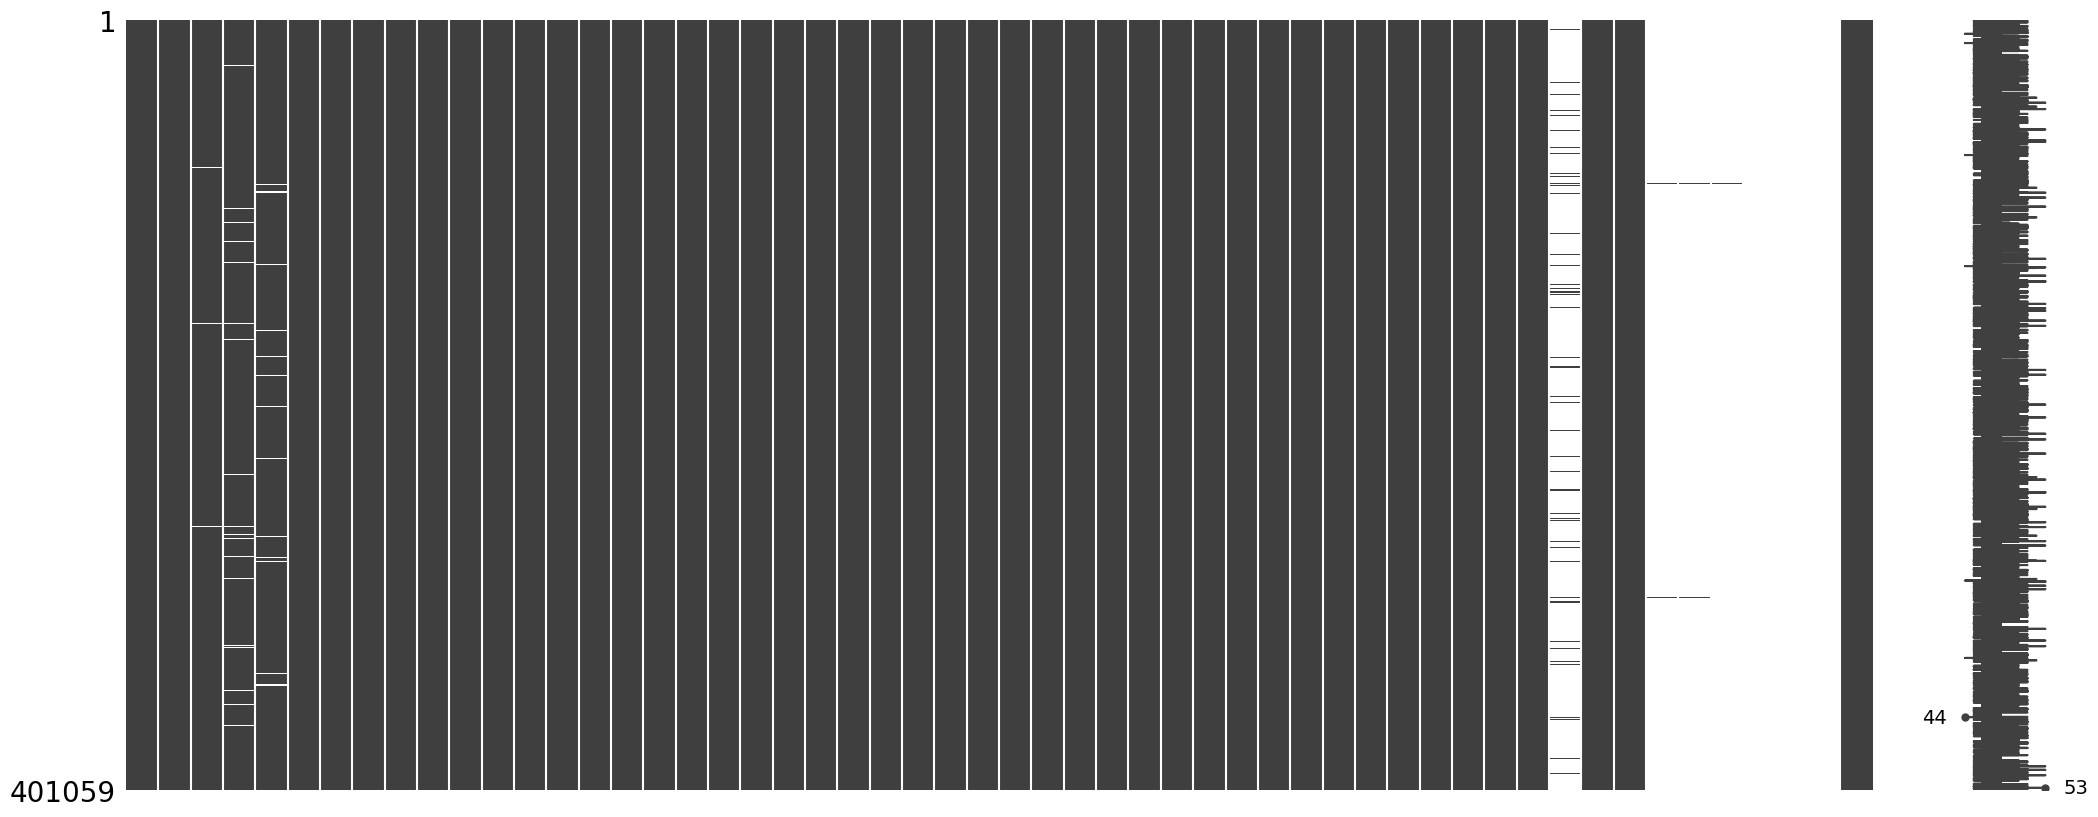

In [13]:
msno.matrix(train_df)
plt.show()

In [14]:
missing = pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False))
missing.columns = ["missing_count"]
missing = missing.loc[(missing!=0).any(axis=1)]
missing["missing_percent"] = missing[0:] / len(train_df) *100

In [15]:
missing # in train_df

,missing_count,missing_percent
iddx_5,401058,99.999751
mel_mitotic_index,401006,99.986785
mel_thick_mm,400996,99.984292
iddx_4,400508,99.862614
iddx_3,399994,99.734453
iddx_2,399991,99.733705
lesion_id,379001,94.500061
sex,11517,2.871647
anatom_site_general,5756,1.435200
age_approx,2798,0.697653


In [16]:
malignant_df = train_df[train_df['target'] == 1].copy()

missing_mal = pd.DataFrame(malignant_df.isnull().sum().sort_values(ascending=False))
missing_mal.columns = ["missing_count"]
missing_mal = missing_mal.loc[(missing_mal!=0).any(axis=1)]
missing_mal["missing_percent"] = missing_mal[0:] / len(malignant_df) *100

missing_mal

,missing_count,missing_percent
iddx_5,393,100.000000
mel_mitotic_index,340,86.513995
mel_thick_mm,330,83.969466
iddx_4,151,38.422392
sex,10,2.544529
age_approx,3,0.763359


In [17]:
train_df['target'].value_counts()

target
0    400666
1       393
Name: count, dtype: int64

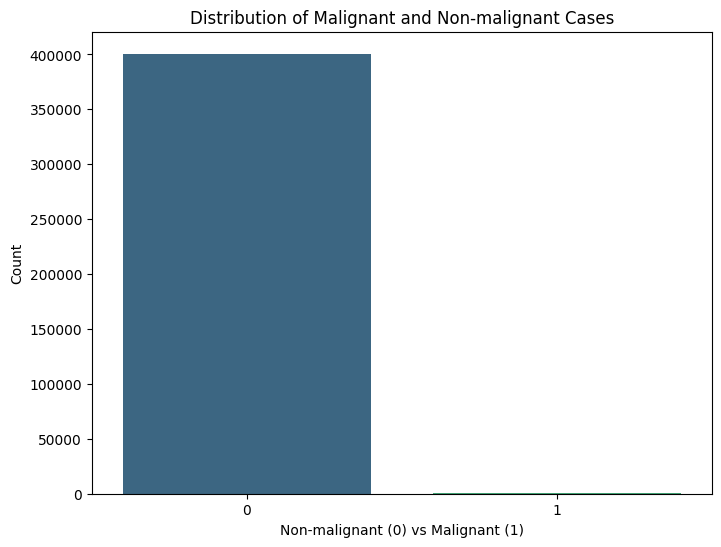

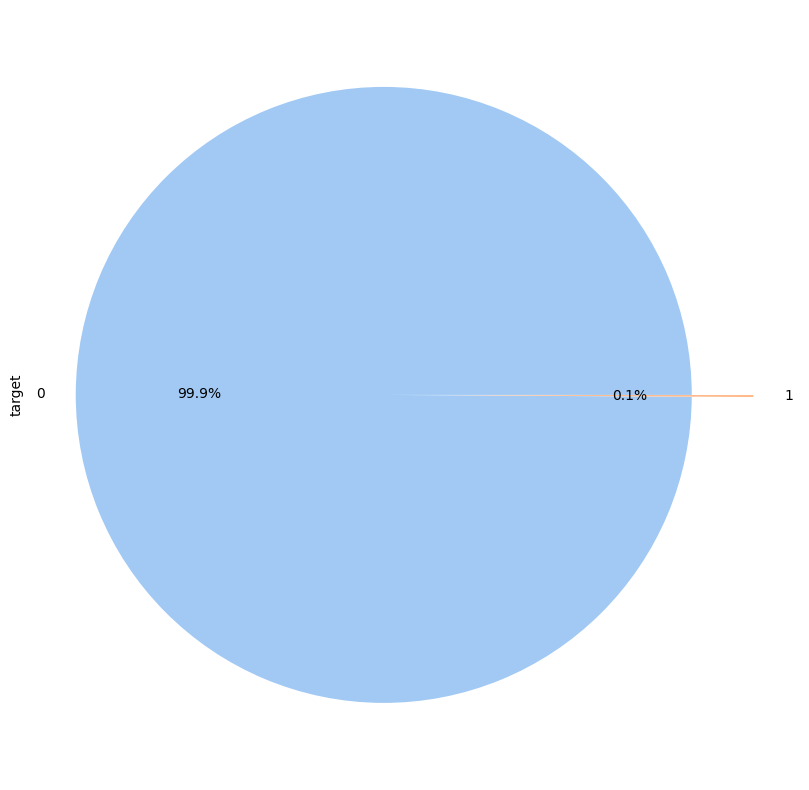

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=train_df, palette='viridis')
plt.xlabel('Non-malignant (0) vs Malignant (1)')
plt.ylabel('Count')
plt.title('Distribution of Malignant and Non-malignant Cases')
plt.show()

plt.figure(figsize=(10,10))
palette_color = sns.color_palette('pastel')
explode = [0.1, 0.1]
train_df.groupby('target')['target'].count().plot.pie(colors=palette_color,explode=explode, autopct="%1.1f%%");

In [19]:
def categorize_age(age):
    if age < 10:
        return '0-10'
    elif age < 20:
        return '11-20'
    elif age < 30:
        return '21-30'
    elif age < 40:
        return '31-40'
    elif age < 50:
        return '41-50'
    elif age < 60:
        return '51-60'
    elif age < 70:
        return '61-70'
    elif age < 80:
        return '71-80'
    elif age < 90:
        return '81-90'
    else:
        return '91-100'

In [20]:
train_df['age_group'] = train_df['age_approx'].apply(categorize_age)
test_df['age_group'] = test_df['age_approx'].apply(categorize_age)

train_df['age_group'] = train_df['age_group'].astype('category')
test_df['age_group'] = test_df['age_group'].astype('category')

In [21]:
age_distribution = train_df.groupby('target')['age_group'].value_counts()
print(age_distribution)

target  age_group
0       61-70        108902
        51-60        105974
        71-80         70503
        41-50         54835
        81-90         29904
        31-40         21936
        21-30          5172
        91-100         2795
        11-20           644
        0-10              1
1       61-70           153
        71-80            73
        51-60            73
        41-50            42
        81-90            39
        31-40             7
        21-30             3
        91-100            3
        11-20             0
        0-10              0
Name: count, dtype: int64


In [22]:
malignant_df['age_group'] = malignant_df['age_approx'].apply(categorize_age)

In [23]:
# Calculate the distribution of age groups for malignant cases
age_group_distribution = malignant_df['age_group'].value_counts().sort_index()

In [24]:
print(age_group_distribution)

age_group
21-30       3
31-40       7
41-50      42
51-60      73
61-70     153
71-80      73
81-90      39
91-100      3
Name: count, dtype: int64


In [25]:
gender_distribution = malignant_df['sex'].value_counts().sort_index()
print(gender_distribution)

sex
female    109
male      274
Name: count, dtype: int64


In [26]:
print(train_df['image_type'].value_counts().sort_index())

image_type
TBP tile: close-up    401059
Name: count, dtype: int64


In [27]:
# gender distribution per age group for malignant cases
print(malignant_df.groupby(['age_group', 'sex']).size().unstack(fill_value=0))

sex        female  male
age_group              
21-30           3     0
31-40           6     0
41-50          17    24
51-60          22    48
61-70          36   114
71-80          17    55
81-90           6    33
91-100          2     0


In [28]:
affected_area = malignant_df['anatom_site_general'].value_counts().sort_index()
print(affected_area)

anatom_site_general
anterior torso      82
head/neck           78
lower extremity     73
posterior torso    103
upper extremity     57
Name: count, dtype: int64


In [29]:
print(malignant_df.groupby(['anatom_site_general', 'age_group']).size().unstack(fill_value=0))

age_group            21-30  31-40  41-50  51-60  61-70  71-80  81-90  91-100
anatom_site_general                                                         
anterior torso           1      2      9     17     25     14     14       0
head/neck                1      2      6      9     43     10      6       1
lower extremity          1      1      6     16     25     18      6       0
posterior torso          0      2     16     16     39     21      8       1
upper extremity          0      0      5     15     21     10      5       1


In [30]:
print(malignant_df.groupby(['anatom_site_general', 'sex']).size().unstack(fill_value=0))

sex                  female  male
anatom_site_general              
anterior torso           21    59
head/neck                11    66
lower extremity          31    41
posterior torso          32    69
upper extremity          14    39


In [31]:
numerical_features = train_df.select_dtypes(include=['float64']).columns.tolist()

In [32]:
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [33]:
categorical_features

['patient_id',
 'sex',
 'anatom_site_general',
 'image_type',
 'tbp_tile_type',
 'tbp_lv_location',
 'tbp_lv_location_simple',
 'attribution',
 'copyright_license',
 'lesion_id',
 'iddx_full',
 'iddx_1',
 'iddx_2',
 'iddx_3',
 'iddx_4',
 'iddx_5',
 'mel_mitotic_index',
 'age_group']

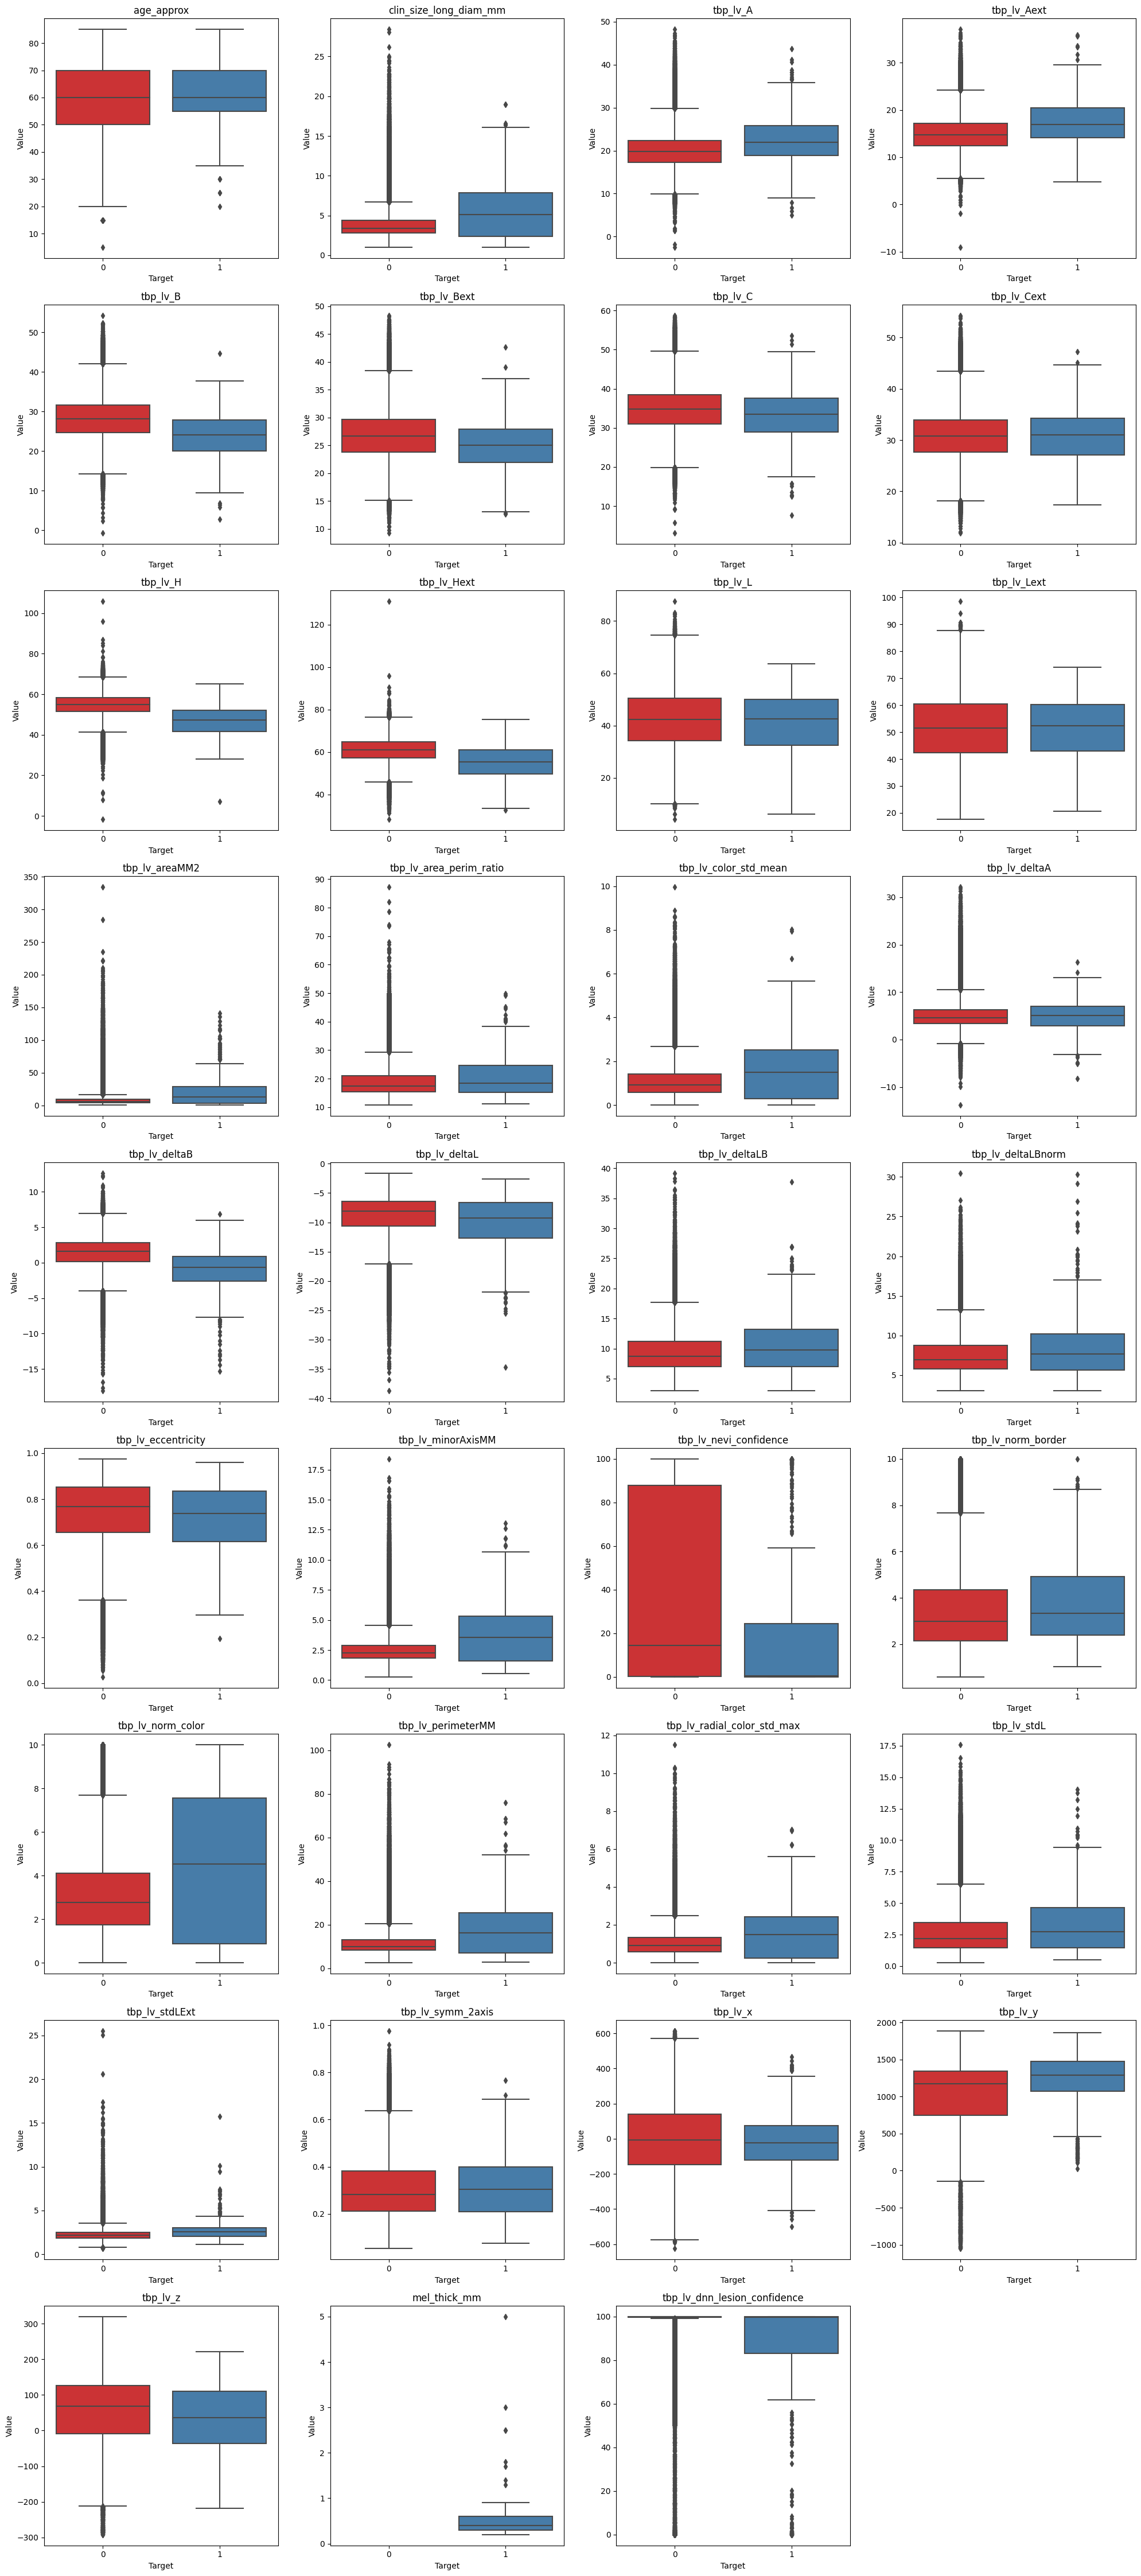

In [34]:
n_cols = 4

n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Create box plots for each numerical feature by 'target'
for ax, feature in zip(axes.flatten(), numerical_features):
    sns.boxplot(x='target', y=feature, data=train_df, ax=ax, palette='Set1')
    ax.set_title(feature)
    ax.set_xlabel('Target')
    ax.set_ylabel('Value')

# Remove empty subplots
for i in range(len(numerical_features), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

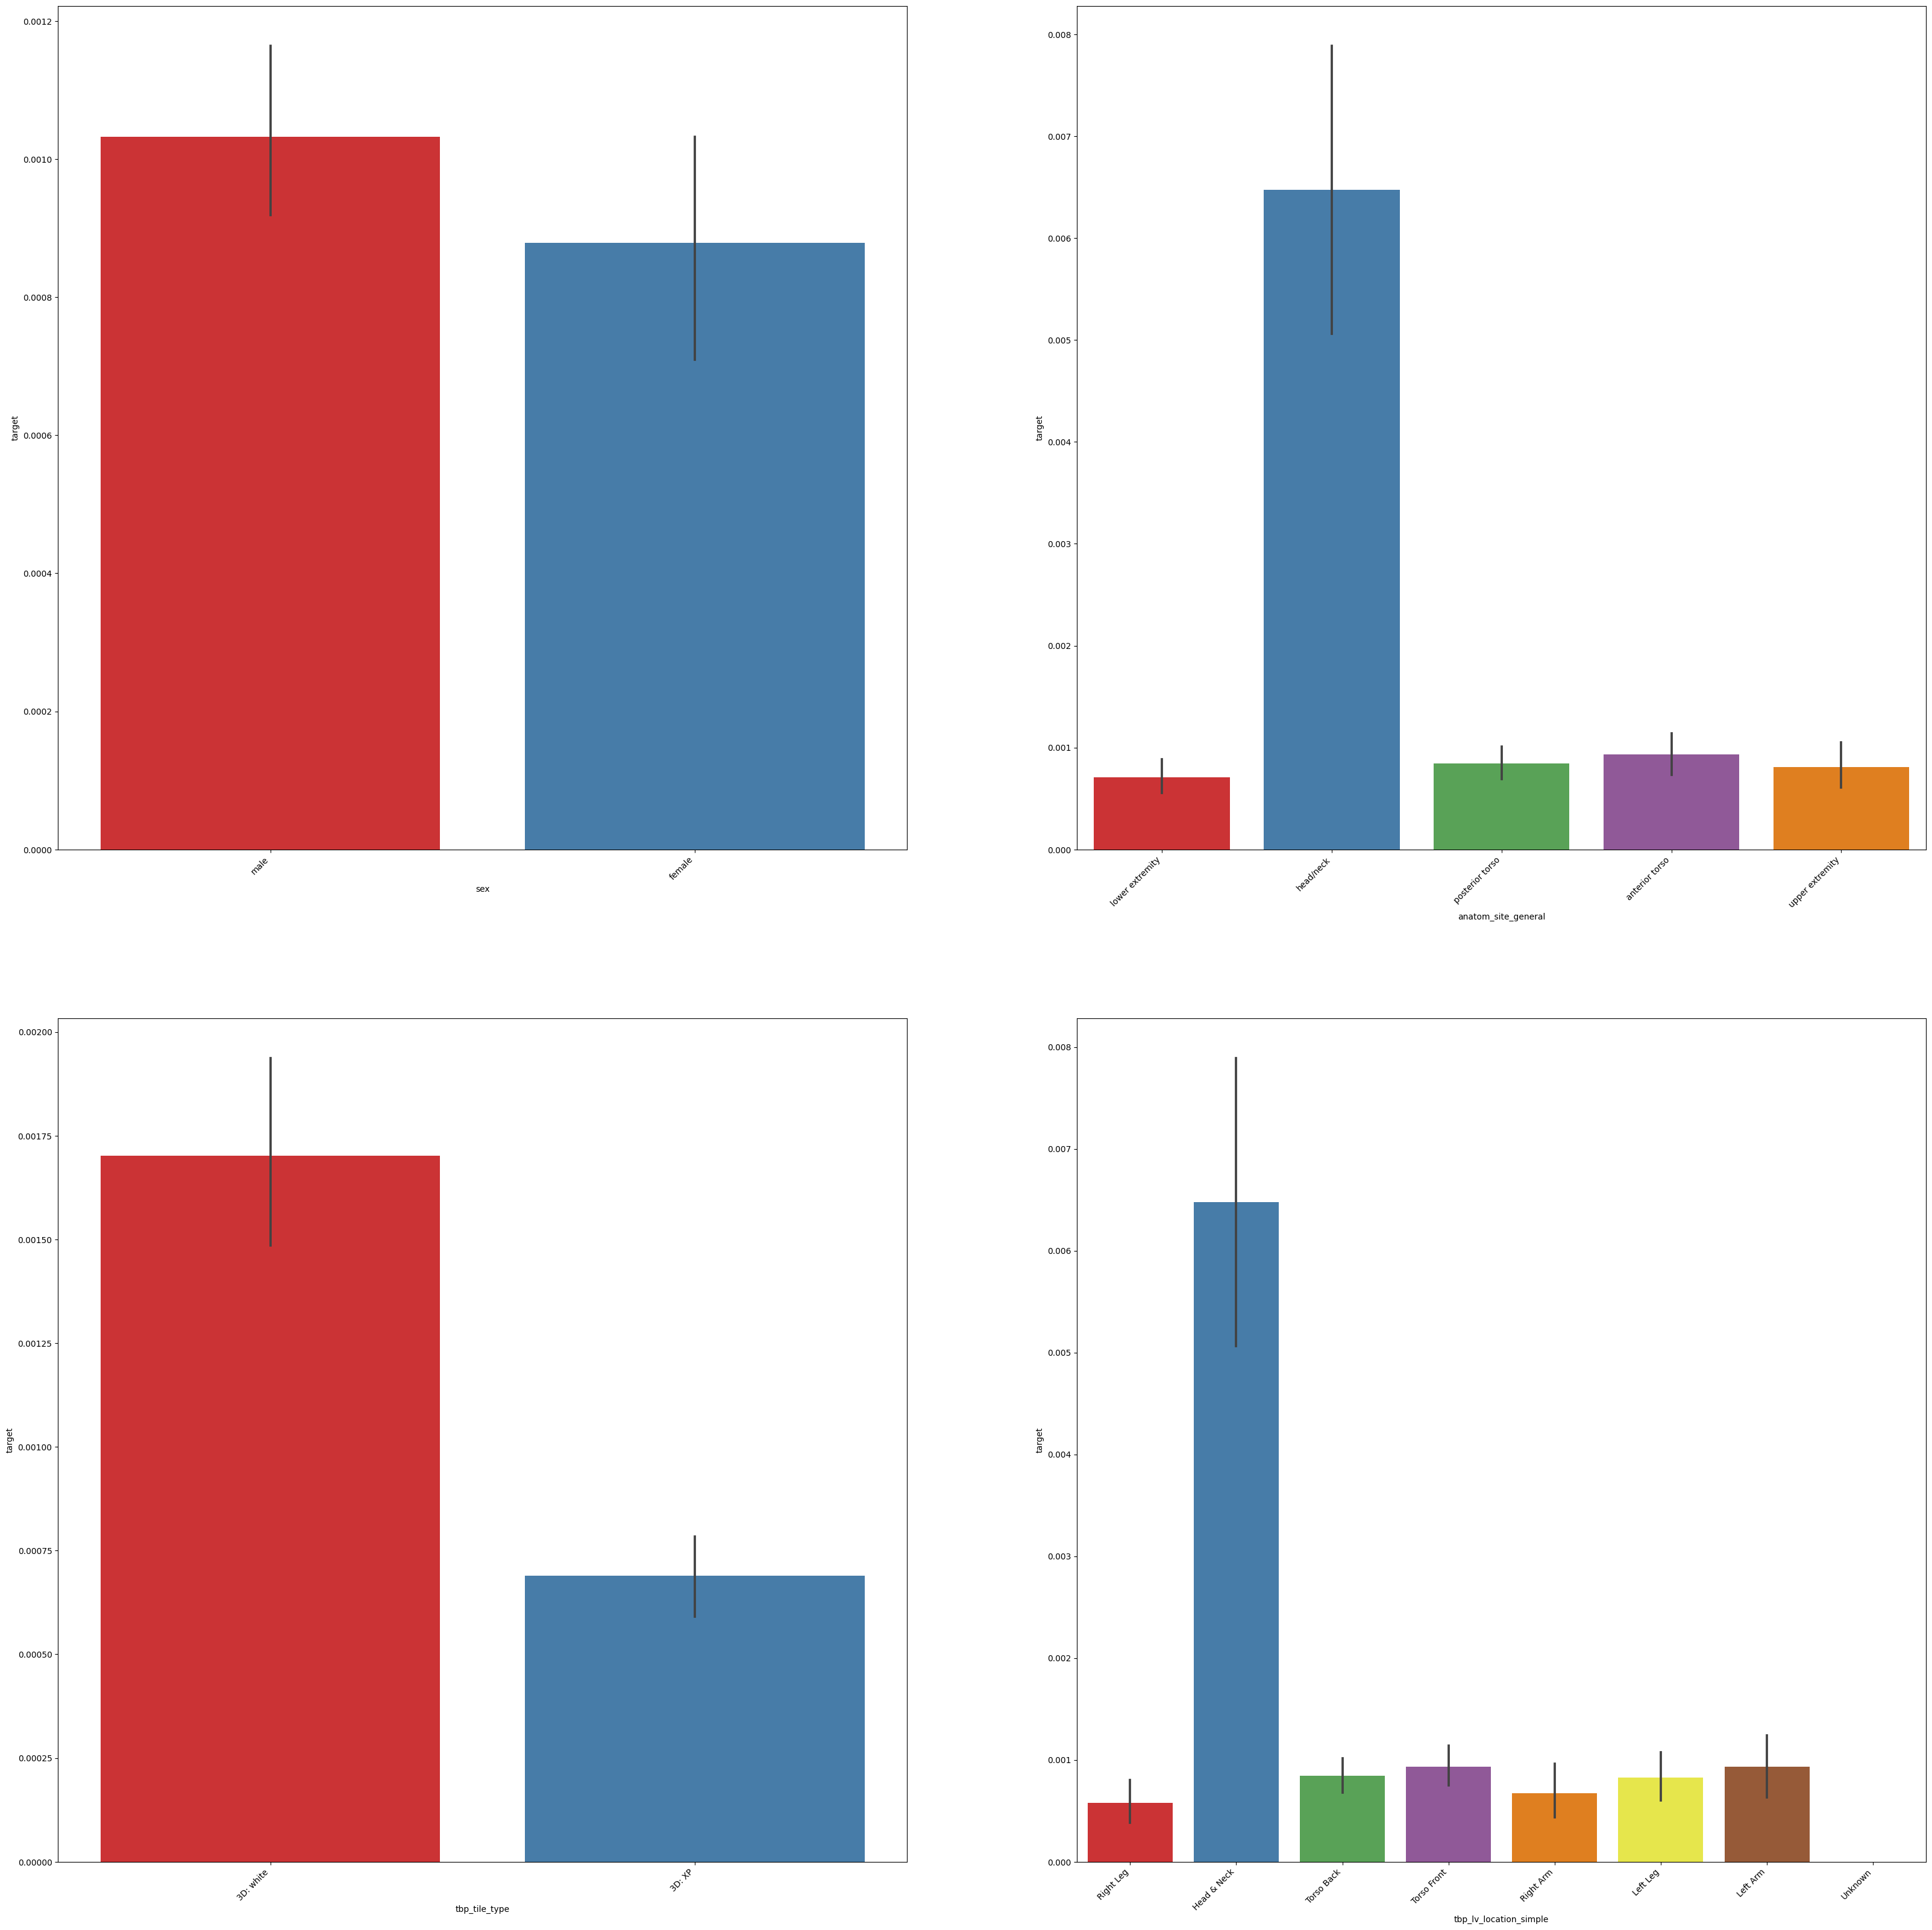

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(40, 40))
for var, subplot in zip(['sex', 'anatom_site_general', 'tbp_tile_type',  'tbp_lv_location_simple'], ax.flatten()):
    sns.barplot(x=var,y= 'target',  data=train_df, ax=subplot, palette='Set1')
    subplot.set_xticklabels(subplot.get_xticklabels(), rotation=45, ha='right')

In [36]:
categorical_features

['patient_id',
 'sex',
 'anatom_site_general',
 'image_type',
 'tbp_tile_type',
 'tbp_lv_location',
 'tbp_lv_location_simple',
 'attribution',
 'copyright_license',
 'lesion_id',
 'iddx_full',
 'iddx_1',
 'iddx_2',
 'iddx_3',
 'iddx_4',
 'iddx_5',
 'mel_mitotic_index',
 'age_group']

Let's look into mutual information between numerical features and the target (a measure of the dependency between variables)

In [37]:
mutual_df = train_df[numerical_features]

In [38]:
mutual_info = mutual_info_classif(mutual_df.fillna(mutual_df.mean()), train_df['target'], random_state=random_state)

In [39]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns

In [40]:
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"])

In [41]:
mutual_info.style.background_gradient("Blues")

,Numerical_Feature_MI
mel_thick_mm,0.126030
age_approx,0.010365
tbp_lv_dnn_lesion_confidence,0.003909
clin_size_long_diam_mm,0.001618
tbp_lv_perimeterMM,0.001333
tbp_lv_areaMM2,0.001317
tbp_lv_minorAxisMM,0.001195
tbp_lv_H,0.000808
tbp_lv_radial_color_std_max,0.000666
tbp_lv_Hext,0.000638


In [42]:
mutual_df_categorical = train_df[categorical_features]

# Encode categorical features
for colname in mutual_df_categorical:
    mutual_df_categorical[colname], _ = mutual_df_categorical[colname].factorize()

# Calculate mutual information for categorical features
mutual_info = mutual_info_classif(mutual_df_categorical.fillna("Do_not_have_feature"), train_df['target'], random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df_categorical.columns

mutual_info_df = pd.DataFrame(mutual_info.sort_values(ascending=False), columns=["Categorical_Feature_MI"])
mutual_info_df.style.background_gradient(cmap="Blues")

,Categorical_Feature_MI
iddx_2,0.125970
iddx_5,0.107683
iddx_3,0.096285
mel_mitotic_index,0.093812
tbp_tile_type,0.085662
iddx_4,0.077282
copyright_license,0.055155
anatom_site_general,0.023779
tbp_lv_location_simple,0.016330
attribution,0.015188


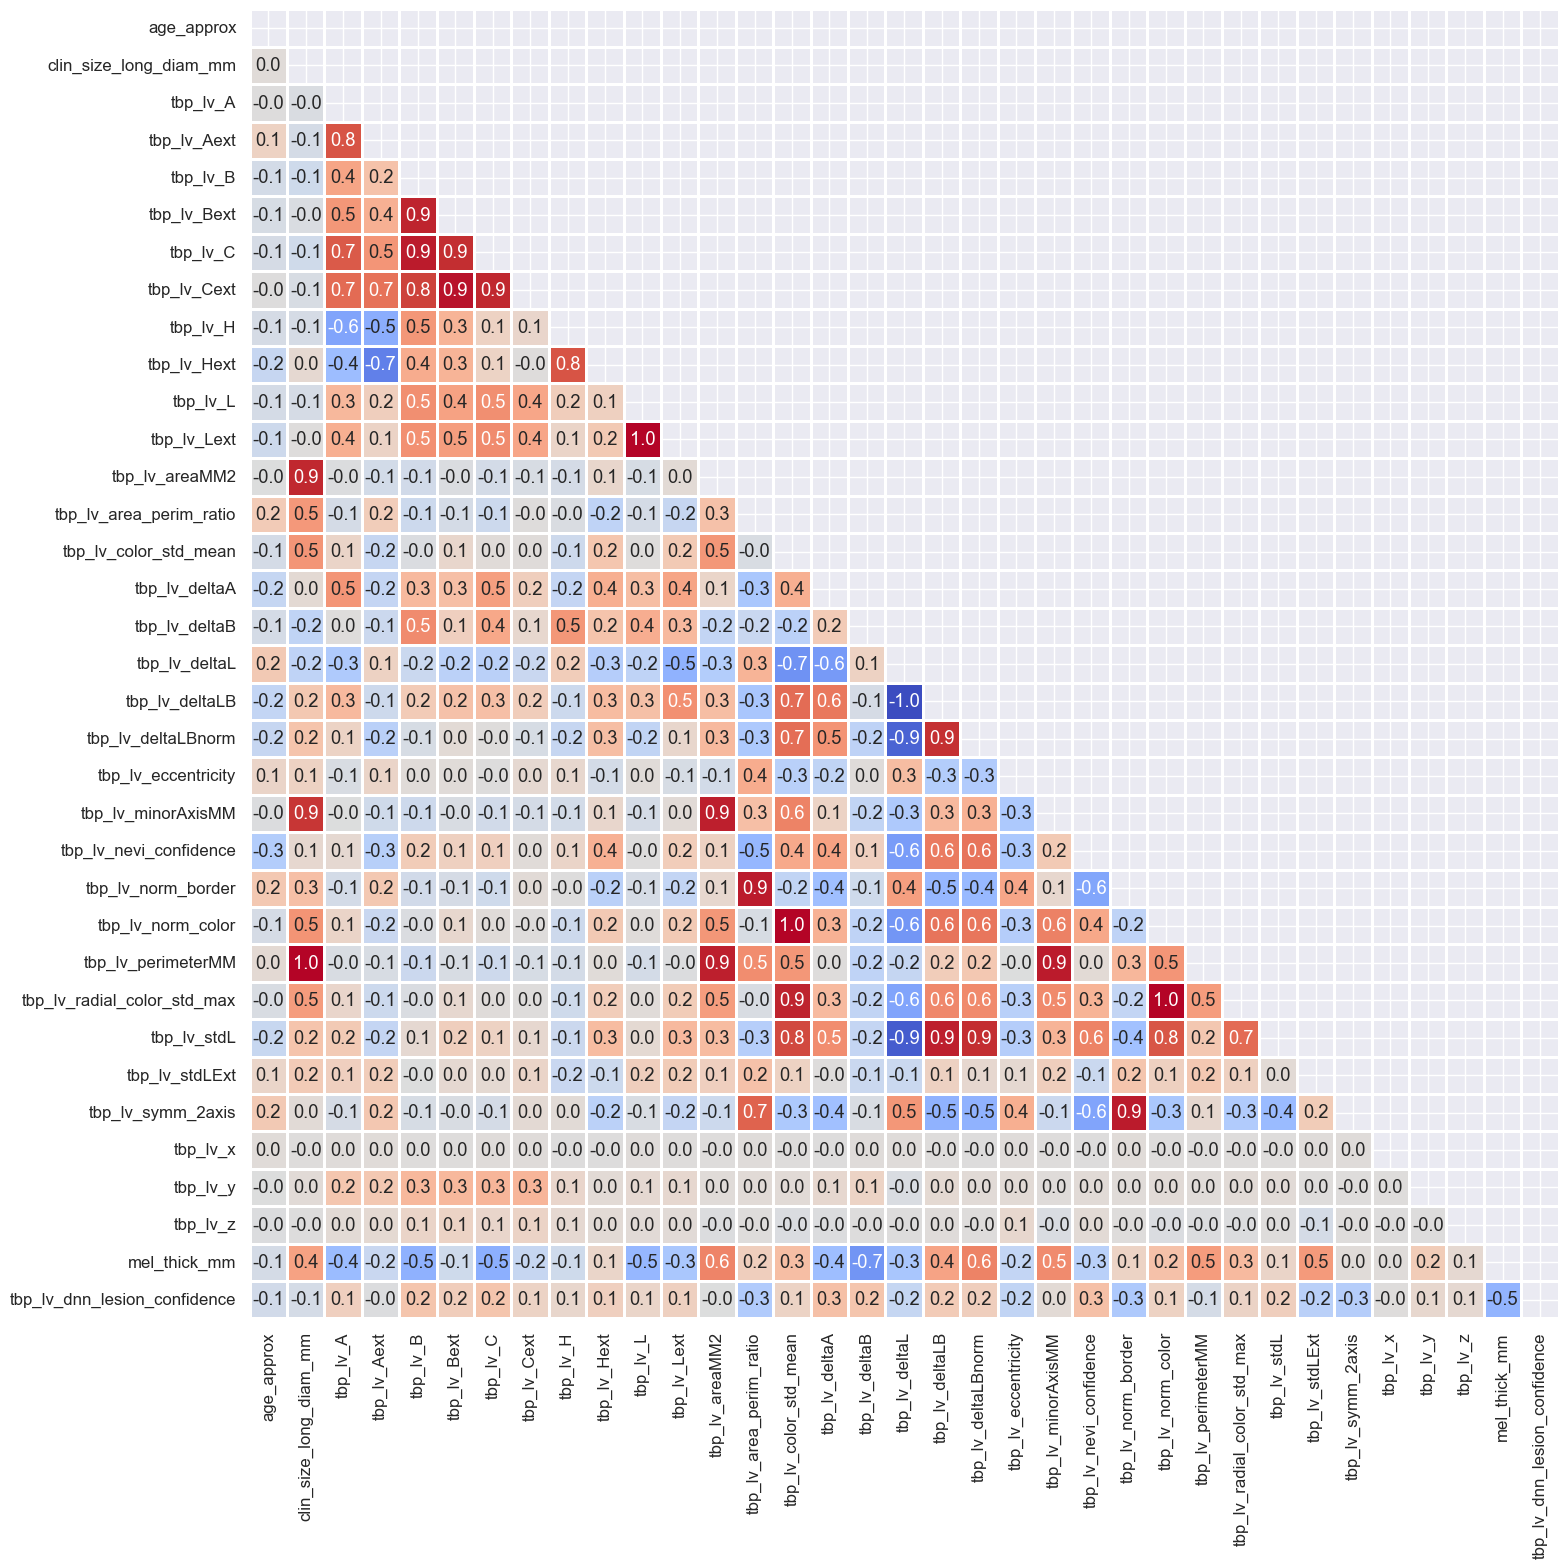

In [43]:
sns.set(font_scale=1.1)
correlation_train = train_df[numerical_features].corr()
mask = np.triu(correlation_train.corr())
plt.figure(figsize=(17, 17))
sns.heatmap(correlation_train,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False);

In [44]:
train_df.head()

,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence,age_group
isic_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,55.828924,54.367448,62.025701,3.152561,27.476170,0.00000,3.982447,2.967674,-7.658253,8.360566,5.784302,0.901302,Right Leg - Upper,Right Leg,1.543016,2.628592e-03,7.091360,0.000000,9.307003,0.00000,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282,61-70
ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,44.064040,48.861520,55.362360,0.919497,12.235290,0.00000,6.347830,1.781713,-6.500838,6.839008,4.987244,0.639885,Head & Neck,Head & Neck,0.821918,1.334303e-07,2.116402,0.000000,3.354148,0.00000,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455,61-70
ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,62.909730,53.961180,61.670520,3.265153,24.184620,0.00000,5.447655,4.485044,-7.709336,9.092376,6.290359,0.932147,Torso Back Top Third,Torso Back,1.194905,2.959177e-04,4.798335,0.000000,8.886309,0.00000,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040,61-70
ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,60.060388,18.649518,23.314841,6.079940,14.889242,0.51452,2.077572,0.326788,-4.665323,4.783413,6.400196,0.654458,Torso Front Top Half,Torso Front,2.481328,2.198945e+01,1.975874,1.771705,9.514499,0.66469,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998,61-70
ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,52.041180,46.276310,54.855740,2.101708,19.902560,0.00000,4.668053,0.754434,-8.579431,9.148495,6.531302,0.946448,Torso Front Top Half,Torso Front,0.929916,1.378832e-03,3.658854,0.000000,6.467562,0.00000,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510,51-60


In [45]:
numerical_features = train_df.select_dtypes(include=['float64']).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

In [46]:
categorical_features

['patient_id',
 'sex',
 'anatom_site_general',
 'image_type',
 'tbp_tile_type',
 'tbp_lv_location',
 'tbp_lv_location_simple',
 'attribution',
 'copyright_license',
 'lesion_id',
 'iddx_full',
 'iddx_1',
 'iddx_2',
 'iddx_3',
 'iddx_4',
 'iddx_5',
 'mel_mitotic_index',
 'age_group']

In [47]:
categorical_features = [#'patient_id',
 'sex',
 'anatom_site_general',
 'tbp_tile_type',
 'tbp_lv_location',
 'tbp_lv_location_simple',
 'attribution',
 'copyright_license',
 #'lesion_id',
 #iddx_full',
 #'iddx_1',
 #'iddx_2',
 #'iddx_3',
 #'iddx_4',
 #'iddx_5',
 #'mel_mitotic_index',
 'age_group']

In [48]:
numerical_features

['age_approx',
 'clin_size_long_diam_mm',
 'tbp_lv_A',
 'tbp_lv_Aext',
 'tbp_lv_B',
 'tbp_lv_Bext',
 'tbp_lv_C',
 'tbp_lv_Cext',
 'tbp_lv_H',
 'tbp_lv_Hext',
 'tbp_lv_L',
 'tbp_lv_Lext',
 'tbp_lv_areaMM2',
 'tbp_lv_area_perim_ratio',
 'tbp_lv_color_std_mean',
 'tbp_lv_deltaA',
 'tbp_lv_deltaB',
 'tbp_lv_deltaL',
 'tbp_lv_deltaLB',
 'tbp_lv_deltaLBnorm',
 'tbp_lv_eccentricity',
 'tbp_lv_minorAxisMM',
 'tbp_lv_nevi_confidence',
 'tbp_lv_norm_border',
 'tbp_lv_norm_color',
 'tbp_lv_perimeterMM',
 'tbp_lv_radial_color_std_max',
 'tbp_lv_stdL',
 'tbp_lv_stdLExt',
 'tbp_lv_symm_2axis',
 'tbp_lv_x',
 'tbp_lv_y',
 'tbp_lv_z',
 'mel_thick_mm',
 'tbp_lv_dnn_lesion_confidence']

In [49]:
train_df = train_df.drop('age_approx', axis=1)
test_df = test_df.drop('age_approx', axis=1)

train_df = train_df.drop('image_type', axis=1)
test_df = test_df.drop('image_type', axis=1)

#train_df = train_df.drop('lesion_id', axis=1)
#test_df = test_df.drop('lesion_id', axis=1)

In [50]:
# Convert categorical features to category dtype
for col in categorical_features:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

In [51]:
# One-Hot Encoding of categorical variables
train_df = pd.get_dummies(train_df, columns=categorical_features)
test_df = pd.get_dummies(test_df, columns=categorical_features)

In [52]:
#train_df['image_type'] = train_df['image_type'].astype('category')
#test_df['image_type'] = test_df['image_type'].astype('category')

### Modeling

In [53]:
y = train_df['target']
train_df = train_df.drop(['target'], axis=1)

In [54]:
def partial_auc_score(y_actual, y_scores):
    tpr_threshold = 0.80
    max_fpr = 1 - tpr_threshold

    # create numpy arrays
    y_actual = np.asarray(y_actual)
    y_scores = np.asarray(y_scores)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_actual, y_scores)

    # Find the index where fpr exceeds max_fpr
    stop_index = np.searchsorted(fpr, max_fpr, side='right')

    if stop_index < len(fpr):
        # Interpolate to find the TPR at max_fpr
        fpr_interp_points = [fpr[stop_index - 1], fpr[stop_index]]
        tpr_interp_points = [tpr[stop_index - 1], tpr[stop_index]]
        tpr = np.append(tpr[:stop_index], np.interp(max_fpr, fpr_interp_points, tpr_interp_points))
        fpr = np.append(fpr[:stop_index], max_fpr)
    else:
        tpr = np.append(tpr, 1.0)
        fpr = np.append(fpr, max_fpr)

    # Calculate partial AUC
    partial_auc_value = auc(fpr, tpr)

    return partial_auc_value

partial_auc_scorer = make_scorer(partial_auc_score, needs_proba=True)

### Cross-validaiton setup

In [55]:
cv = StratifiedGroupKFold(n_splits=5) # 10 folds

In [56]:
def cross_validate_model(model, X_train, y_train, cv, X_test):
    val_scores = []
    test_predictions = np.zeros((X_test.shape[0],))
    oof_predictions = np.zeros((X_train.shape[0],))

    X_train = X_train.copy()
    X_test = X_test.copy()
    
    groups = X_train['patient_id']

    if isinstance(model, CatBoostClassifier):
        cat_features = model.get_params().get('cat_features', [])
        X_train, X_test = preprocess_catboost(X_train, X_test, cat_features)

    X_train_no_id = X_train.drop('patient_id', axis=1)
    X_test_no_id = X_test.drop('patient_id', axis=1)

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_no_id, y_train, groups)):
        X_fold_train = X_train_no_id.iloc[train_idx].reset_index(drop=True)
        y_fold_train = y_train.iloc[train_idx].reset_index(drop=True)
        
        X_fold_val = X_train_no_id.iloc[val_idx].reset_index(drop=True)
        y_fold_val = y_train.iloc[val_idx].reset_index(drop=True)
        
        model_fold = clone(model)

        eval_set = [(X_fold_val, y_fold_val)]
        
        if isinstance(model, LGBMClassifier):
            model_fold.fit(
                X_fold_train, y_fold_train,
                eval_set=eval_set,
                callbacks=[early_stopping(50)],
            )
        else:  # For CatBoost and XGBoost due to different .fit() arguments
            model_fold.fit(
                X_fold_train, y_fold_train,
                eval_set=eval_set,
                early_stopping_rounds=50,
                verbose=False
            )
        
        val_preds = model_fold.predict_proba(X_fold_val)[:, 1]

        val_score = partial_auc_score(y_fold_val, val_preds)  
        
        print(f'Fold {fold} partial AUC score: {val_score:.5f}')
        
        val_scores.append(val_score)
        
        oof_predictions[val_idx] = val_preds

        test_predictions += model_fold.predict_proba(X_test_no_id)[:, 1] / cv.get_n_splits()

    mean_val_score = np.mean(val_scores)
    std_val_score = np.std(val_scores)
    print(f'Mean valid. score: {mean_val_score:.7f}')
    print(f'Std valid. score: {std_val_score:.7f}')
    
    return val_scores, test_predictions, oof_predictions

In [57]:
xgb_params = {
    "n_estimators": 100,
    "learning_rate": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "use_label_encoder": False  # This is necessary to avoid warnings in recent versions
}

In [58]:
xgb_model = XGBClassifier(**xgb_params, random_state=42)

In [59]:
cv_summary, test_preds_df, oof_preds_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

In [60]:
# As I got an error about different number of features in two datasets :/
common_features = train_df.columns.intersection(test_df.columns)
train_df = train_df[common_features]
test_df = test_df[common_features]

In [61]:
cv_summary['xgb'], test_preds_df['xgb'], oof_preds_df['xgb'] = cross_validate_model(xgb_model, train_df, y, cv, test_df)

Fold 0 partial AUC score: 0.16148
Fold 1 partial AUC score: 0.15418
Fold 2 partial AUC score: 0.16311
Fold 3 partial AUC score: 0.16241
Fold 4 partial AUC score: 0.15750
Mean valid. score: 0.1597366
Std valid. score: 0.0033893


In [64]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

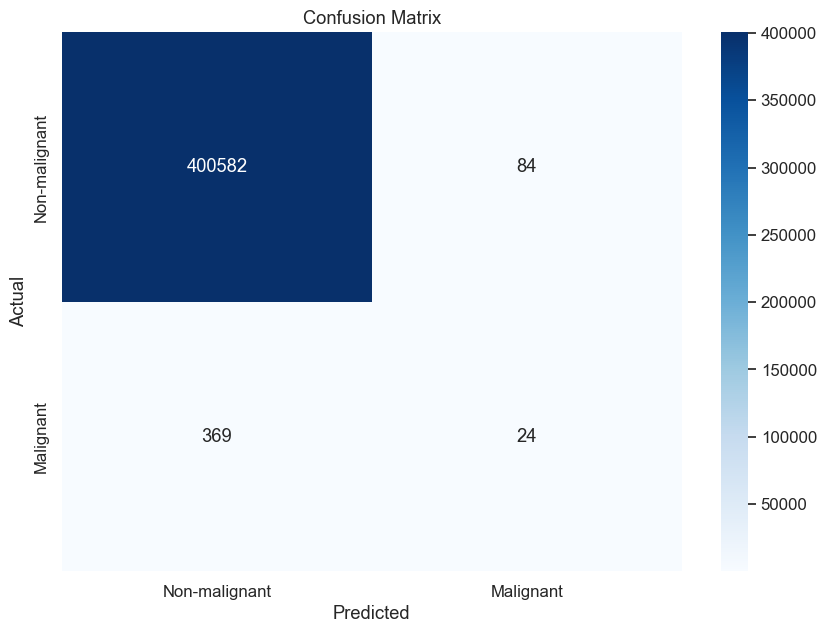

Precision: 0.2222
Recall: 0.0611
F1 Score: 0.0958
Precision for class 0 (Non-malignant): 0.9991
Precision for class 1 (Malignant): 0.2222


In [65]:
y_pred = (oof_preds_df['xgb'] > 0.2).astype(int)
plot_confusion_matrix(y, y_pred, classes=['Non-malignant', 'Malignant'])

precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Precision score for both classes
precision_classes = precision_score(y, y_pred, average=None)
print(f"Precision for class 0 (Non-malignant): {precision_classes[0]:.4f}")
print(f"Precision for class 1 (Malignant): {precision_classes[1]:.4f}")